In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=972017a932f704f1fbb9322928ad575c'

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | panjab
Processing Record 2 of Set 13 | puerto escondido
Processing Record 3 of Set 13 | rikitea
Processing Record 4 of Set 13 | coquimbo
Processing Record 5 of Set 13 | mursalimkino
Processing Record 6 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 13 | cape town
Processing Record 8 of Set 13 | dwarahat
Processing Record 9 of Set 13 | hithadhoo
Processing Record 10 of Set 13 | puerto ayora
Processing Record 11 of Set 13 | vaini
Processing Record 12 of Set 13 | sawakin
Processing Record 13 of Set 13 | kruisfontein
Processing Record 14 of Set 13 | denpasar
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | opelousas
Processing Record 17 of Set 13 | aitape
Processing Record 18 of Set 13 | mahebourg
Processing Record 19 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 13 | lorengau
Processing Record 21 of Set 13 | 

Processing Record 34 of Set 16 | vanderhoof
Processing Record 35 of Set 16 | airai
Processing Record 36 of Set 16 | dezful
Processing Record 37 of Set 16 | tazovskiy
Processing Record 38 of Set 16 | takoradi
Processing Record 39 of Set 16 | kununurra
Processing Record 40 of Set 16 | dalianwan
Processing Record 41 of Set 16 | srednekolymsk
Processing Record 42 of Set 16 | jamestown
Processing Record 43 of Set 16 | corralillo
Processing Record 44 of Set 16 | khanpur
Processing Record 45 of Set 16 | acajutla
Processing Record 46 of Set 16 | broome
Processing Record 47 of Set 16 | pipar
Processing Record 48 of Set 16 | skjervoy
Processing Record 49 of Set 16 | sitka
Processing Record 50 of Set 16 | llanes
Processing Record 1 of Set 17 | noumea
Processing Record 2 of Set 17 | waipawa
Processing Record 3 of Set 17 | pozoblanco
Processing Record 4 of Set 17 | alofi
Processing Record 5 of Set 17 | makat
Processing Record 6 of Set 17 | comodoro rivadavia
Processing Record 7 of Set 17 | palmer
P

Processing Record 22 of Set 20 | gorontalo
Processing Record 23 of Set 20 | katiola
Processing Record 24 of Set 20 | benin
Processing Record 25 of Set 20 | ruatoria
City not found. Skipping...
Processing Record 26 of Set 20 | santa cruz
Processing Record 27 of Set 20 | chadan
Processing Record 28 of Set 20 | aguimes
Processing Record 29 of Set 20 | dongzhen
Processing Record 30 of Set 20 | faanui
Processing Record 31 of Set 20 | iracoubo
Processing Record 32 of Set 20 | mehamn
Processing Record 33 of Set 20 | mocambique
City not found. Skipping...
Processing Record 34 of Set 20 | yatsuo
Processing Record 35 of Set 20 | tabou
Processing Record 36 of Set 20 | half moon bay
Processing Record 37 of Set 20 | acari
Processing Record 38 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 39 of Set 20 | diego de almagro
Processing Record 40 of Set 20 | cidreira
Processing Record 41 of Set 20 | namibe
Processing Record 42 of Set 20 | el dorado
Processing Record 43 of Set 20 | pan

Processing Record 5 of Set 24 | atraulia
Processing Record 6 of Set 24 | beachwood
Processing Record 7 of Set 24 | santiago del estero
Processing Record 8 of Set 24 | port hardy
Processing Record 9 of Set 24 | narsaq
Processing Record 10 of Set 24 | tongzi
Processing Record 11 of Set 24 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 24 | tura
Processing Record 13 of Set 24 | nemuro
Processing Record 14 of Set 24 | auki
Processing Record 15 of Set 24 | severnyy
Processing Record 16 of Set 24 | barawe
City not found. Skipping...
Processing Record 17 of Set 24 | el alto
Processing Record 18 of Set 24 | sari
Processing Record 19 of Set 24 | kibala
Processing Record 20 of Set 24 | palana
Processing Record 21 of Set 24 | paternion
Processing Record 22 of Set 24 | waingapu
Processing Record 23 of Set 24 | benjamin constant
Processing Record 24 of Set 24 | oksfjord
Processing Record 25 of Set 24 | camaqua
Processing Record 26 of Set 24 | pandamatenga
Processing Record 27 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Panjab,34.3880,67.0233,-10.44,48,1,5.32,AF,2022-01-25 00:11:30
1,Puerto Escondido,15.8500,-97.0667,85.03,70,0,6.91,MX,2022-01-25 00:11:30
2,Rikitea,-23.1203,-134.9692,78.46,73,100,18.16,PF,2022-01-25 00:11:30
3,Coquimbo,-29.9533,-71.3436,65.23,81,6,3.27,CL,2022-01-25 00:11:31
4,Mursalimkino,55.0379,58.5585,4.69,99,99,3.58,RU,2022-01-25 00:11:31
5,Cape Town,-33.9258,18.4232,68.34,85,11,14.00,ZA,2022-01-25 00:11:32
6,Dwarahat,29.7833,79.4333,35.15,87,18,3.58,IN,2022-01-25 00:11:32
7,Hithadhoo,-0.6000,73.0833,81.03,74,91,14.25,MV,2022-01-25 00:11:32
8,Puerto Ayora,-0.7393,-90.3518,74.28,89,86,10.89,EC,2022-01-25 00:11:33
9,Vaini,-21.2000,-175.2000,80.38,77,16,14.20,TO,2022-01-25 00:11:33


In [4]:
#reorder the column
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Panjab,AF,2022-01-25 00:11:30,34.3880,67.0233,-10.44,48,1,5.32
1,Puerto Escondido,MX,2022-01-25 00:11:30,15.8500,-97.0667,85.03,70,0,6.91
2,Rikitea,PF,2022-01-25 00:11:30,-23.1203,-134.9692,78.46,73,100,18.16
3,Coquimbo,CL,2022-01-25 00:11:31,-29.9533,-71.3436,65.23,81,6,3.27
4,Mursalimkino,RU,2022-01-25 00:11:31,55.0379,58.5585,4.69,99,99,3.58
5,Cape Town,ZA,2022-01-25 00:11:32,-33.9258,18.4232,68.34,85,11,14.00
6,Dwarahat,IN,2022-01-25 00:11:32,29.7833,79.4333,35.15,87,18,3.58
7,Hithadhoo,MV,2022-01-25 00:11:32,-0.6000,73.0833,81.03,74,91,14.25
8,Puerto Ayora,EC,2022-01-25 00:11:33,-0.7393,-90.3518,74.28,89,86,10.89
9,Vaini,TO,2022-01-25 00:11:33,-21.2000,-175.2000,80.38,77,16,14.20


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

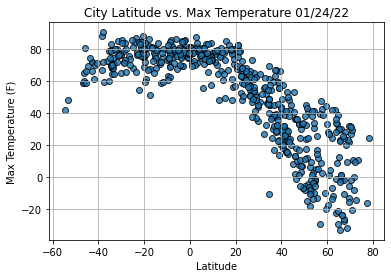

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()